In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# prettier graphs
sns.set(style="whitegrid")


In [2]:
# Population in district (example)
population = 140000   # 1.4 lakh people approx

# Expected recipients of relief payments (lower bound, realistic)
prob_recipient = 0.22   # 22% people might qualify

# Relief amount per person
relief_per_person = 1000   # $1000 per person

# Uncertainty ranges (because reality varies)
population_sd = 8000        # variation in people count
recipient_sd = 0.05         # 5% variation in eligibility
relief_sd = 120             # policy flexibility variation


In [3]:
# Monte Carlo simulation

def simulate_policy_cost(n=10000):
    total_cost = []

    for i in range(n):
        # Random population for realism
        pop = int(np.random.normal(population, population_sd))
        pop = max(pop, 0)

        # Random probability of eligibility
        p = np.random.normal(prob_recipient, recipient_sd)
        p = min(max(p, 0), 1)

        # Random relief amount per person
        relief = np.random.normal(relief_per_person, relief_sd)
        relief = max(relief, 0)

        recipients = int(pop * p)
        cost = recipients * relief
        total_cost.append(cost)

    return np.array(total_cost)



In [4]:
cost_results = simulate_policy_cost(10000)

mean_cost = np.mean(cost_results)
median_cost = np.median(cost_results)
p95_cost = np.percentile(cost_results, 95)

mean_cost, median_cost, p95_cost


(np.float64(30861243.01543877),
 np.float64(30432217.455694817),
 np.float64(45174810.84414126))

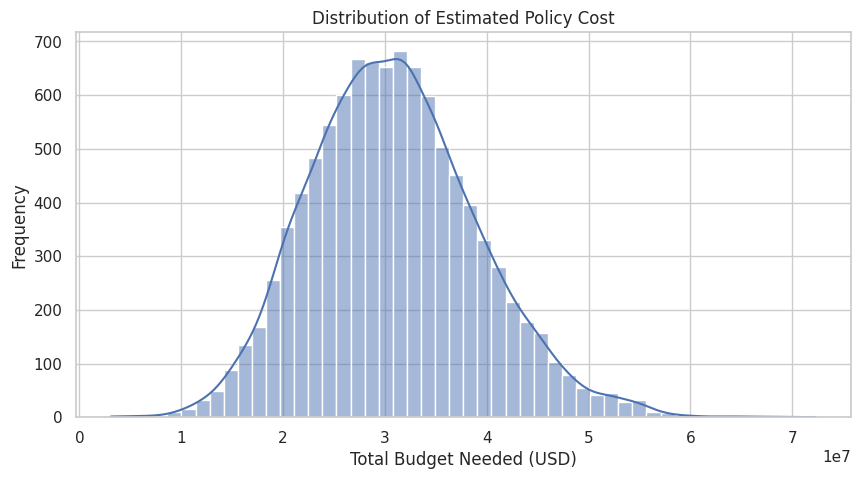

Average Expected Cost: $ 30861243.02
Median Expected Cost: $ 30432217.46
95th Percentile Risk Cost: $ 45174810.84


In [5]:
plt.figure(figsize=(10,5))
sns.histplot(cost_results, bins=50, kde=True)
plt.title("Distribution of Estimated Policy Cost")
plt.xlabel("Total Budget Needed (USD)")
plt.ylabel("Frequency")
plt.show()

print("Average Expected Cost: $", round(mean_cost,2))
print("Median Expected Cost: $", round(median_cost,2))
print("95th Percentile Risk Cost: $", round(p95_cost,2))
